In [1]:
########################## 기본적인 영상 처리 기법 #######################



In [ ]:
###############   영상의 밝기 조절   #############


###### 화소처리(Point processing) ######
# :입력영상의 특정좌표 픽셀값을 변경하여 출력영상의 해당좌표 픽셀값으로 설정하는 연산
# : 결과영상의 픽셀값이 정해진범위(e.g. 그레이스케일)에 있어야함

#### 1) 밝기 조절
# 영상 밝기 조절에는 saturation에 대한 개념 필요(포화)
# cv2.add(src1, src2, dst=None, mask=None, dtype=None) -> dst
# -src1: (입력) 첫번째영상 또는 스칼라 
# -src2: (입력) 두번째영상 또는 스칼라 
# -dst: (출력) 덧셈연산의 결과영상 
# -mask: 마스크영상 
# -dtype: 출력영상(dst)의 타입. (e.g.) cv2.CV_8U, cv2.CV_32F 등 
#     스칼라(Scalar)는 실수값하나 또는 실수값 네개로 구성된 튜플 
#     dst를함수인자로 전달하려면 dst의 크기가src1, src2와같아야하며, 타입이 적절해야함


import sys
import numpy as np
import cv2


### 그레이스케일 영상 add 활용 ###
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.add(src, 100)  ## saturation 존재, 255가 끝
dst2 = src + 100         ## saturaion 없음, 한바퀴 회전함(ex. 170 -> 14)
print(src, dst, dst2, sep='\n\n')
#dst = np.clip(src + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()






In [28]:
### 컬러 영상 add 활용 ###


import sys
import numpy as np
import cv2

src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

print("lenna's shape :", src.shape )
dst = cv2.add(src, (100, 100, 100, 0))   ### BGR + Alpha까지 4개 원소

dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)  ### cv2.add와 동일한 연산을 수행하는 코드 = np.clip(array, min, max)
                                                    # array 내의 element들에 대해서
                                                    # min 값 보다 작은 값들을 min값으로 바꿔주고
                                                    # max 값 보다 큰 값들을 max값으로 바꿔주는 함수
dst3 = np.clip(src + 100, 0, 255).astype(np.uint8)  ## np.clip에 실수가 아닌, 정수를 넣었을때 -> 효과 적용안됨

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.waitKey(3000)

cv2.destroyAllWindows()

lenna's shape : (512, 512, 3)


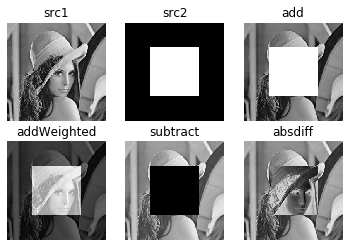

In [29]:
###### 영상의 산술 연산 #######


### 덧셈연산(add)
# cv2.add(src1, src2, dst=None, mask=None, dtype=None) -> dst
# : 포화 개념 포함(255넘으면, 255처리)

### 가중치합(add weighted ) :
# : 포화 개념 포함(255넘으면, 255처리)
#  cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None) -> dst
# -src1: 첫번째영상 
# -alpha: 첫번째영상가중치 
# -src2: 두번째영상. src1과같은크기 & 같은타입 
# -beta: 두번째영상가중치 
# -gamma: 결과 영상에 추가적으로 더할 값 
# -dst: 가중치합 결과 영상 
# -dtype: 출력영상(dst)의 타입


### 뺄셈 연산(substract)
# 포화개념 포함 ( 0아래면 0으로 처리 )
# cv2.subtract(src1, src2, dst=None, mask=None, dtype=None) -> dst
#  - mask: 마스크영상


### 차이 연산(absdiff) - 뺄셈과는 다르게, 절대값 취함
# cv2.absdiff(src1, src2, dst=None) -> dst
# 포화개념 필요없음
 

import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt


src1 = cv2.imread('lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()


In [ ]:
### 비트단위AND, OR, XOR, NOT 연산 ###
# : 잘쓰지 않는다고 하면서, 설명 길게 안함

cv2.bitwise_and(src1, src2, dst=None, mask=None) -> dst
cv2.bitwise_or(src1, src2, dst=None, mask=None) -> dst
cv2.bitwise_xor(src1, src2, dst=None, mask=None) -> dst
cv2.bitwise_not(src1, dst=None, mask=None) -> dst


In [2]:
####### 컬러 영상과 색 공간 #######

import sys
import numpy as np
import cv2


# 컬러 영상 불러오기
src = cv2.imread('candies.png', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

# 컬러 영상 속성 확인
print('src.shape:', src.shape)  # src.shape: (480, 640, 3)
print('src.dtype:', src.dtype)  # src.dtype: uint8

# RGB 색 평면 분할
b_plane, g_plane, r_plane = cv2.split(src)  
print(src, b_plane, g_plane, r_plane, sep='\n\n')
# b_plane = src[:, :, 0]
# g_plane = src[:, :, 1]
# r_plane = src[:, :, 2]

cv2.imshow('src', src)
cv2.imshow('B_plane', b_plane)  ### blue 성분의 많고 적음을, 흑백으로 나타냄 -> 많으면 백색, 적으면 흑색
cv2.imshow('G_plane', g_plane)
cv2.imshow('R_plane', r_plane)
cv2.waitKey(5000)

cv2.destroyAllWindows()


src.shape: (480, 640, 3)
src.dtype: uint8
[[[194 183 181]
  [203 186 178]
  [207 179 166]
  ...
  [ 30 237 248]
  [ 27 238 248]
  [ 26 243 250]]

 [[205 187 177]
  [199 176 162]
  [181 150 135]
  ...
  [ 30 237 252]
  [ 28 238 251]
  [ 27 242 253]]

 [[212 184 167]
  [196 165 151]
  [151 116 105]
  ...
  [ 19 228 247]
  [ 18 229 246]
  [ 21 236 251]]

 ...

 [[ 13 152  27]
  [ 13 149  28]
  [  7 142  22]
  ...
  [ 51  39  76]
  [ 35  33  75]
  [ 26  31  73]]

 [[  6 163  16]
  [  9 162  20]
  [  7 159  18]
  ...
  [ 38  33  78]
  [ 26  30  75]
  [ 19  27  71]]

 [[ 12 172  18]
  [ 13 171  19]
  [  9 167  17]
  ...
  [ 28  27  75]
  [ 21  27  73]
  [ 19  28  72]]]

[[194 203 207 ...  30  27  26]
 [205 199 181 ...  30  28  27]
 [212 196 151 ...  19  18  21]
 ...
 [ 13  13   7 ...  51  35  26]
 [  6   9   7 ...  38  26  19]
 [ 12  13   9 ...  28  21  19]]

[[183 186 179 ... 237 238 243]
 [187 176 150 ... 237 238 242]
 [184 165 116 ... 228 229 236]
 ...
 [152 149 142 ...  39  33  31]
 [163

In [12]:
####### 컬러 영상과 색 공간 #######



### 색상모델   
# https://darkpgmr.tistory.com/66

Gray 모델은 색(color) 정보를 사용하지 않고 밝기 정보만으로 영상을 표현하는 것이다. 
(Ycrcb에서 Y(밝기)만을 표현한 것 또는 HSV에서 V(밝기)만을 표현한 것과 같다.)
검정색 0부터 흰색 255까지 총 256단계의 밝기값(intensity)으로 영상 픽셀값을 표현한다.


RGB 모델은 가장 기보적인 빛의 3원색 모델로서 Red, Green, Blue의 3가지 성분으로 봄 
RGB 모델에서 검은색은 R=G=B=0, 흰색은 R=G=B=255, 빨강색은 R=255, G=B=0, 노란색은 R=G=255, B=0로 표현된다. 
R=G=B인 경우는 무채색인 Gray 색상이 된다.


YCbCr 모델은 RGB 색에서 밝기성분(Y)과 색차정보(Cb, Cr)를 분리하여 표현하는 색상모델이다.
컴퓨터 비전 분야에서, 
밝기값은 무시하고 순수한 색상 정보만을 이용하여 영상인식 작업을 수행하는 경우가 많다.
영상인식에 있어서 가장 큰 문제점 중의 하나는 동일한 사물이라 할지라도, 
영상 촬영 환경 및 조건에 따라서 이미지로 나타날 때에는 매우 다양한 형상(색상)이 나올 수 있다는 점이다
색상 변화요인에 대처하는 방법은 크게 2가지로 나뉠 수 있다. 
하나는, 색은 믿을 수 없으니 아예 색을 사용하지 않고 밝기정보(gray값)만을 사용하는 방법이다
두번째는, 밝기 정보는 무시하고 순수한 색상 정보만을 이용하는 방법이 있다. 
그 근거는 그늘에 가려졌을 때나 밝은 곳이나 맑은 날이나 흐린 날 등 이러한 환경 변화에 따라 변하는 것은 영상의 밝기값이지 색 자체는 변함이 없다는 것이다.
이럴때, Ycrcb에서 Y를 제거하여 활용할수 있다.
다만, 순수 색 정보만을 활용할 경우에 주의해야 할 사항이 있다.
검은색 근처에서는 거의 노이즈(noise)로 생각해도 될 작은 차이가 엄청난 색 차이로 나타난다. (유의해야함)


HSV 모델은 Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현한다. 
Hue는 색조(예: 붉은색 계열인지 푸른색 계열인지, ...)를, Saturation은 그 색이 얼마나 선명한(순수한) 색인지를, Value는 밝기(intensity)를 나타낸다. 
HSV 모델은 우리가 색을 가장 직관적으로 표현할 수 있는 모델이며 또한 머리속에서 상상하는 색을 가장 쉽게 만들어낼 수 있는 모델이다. (공감은 안됨)
영상처리/영상인식에서 HSV 모델을 사용할 때, H, S, V 각각은 0 ~ 255 사이의 값으로 표현된다. 
H 값은 색의 종류를 나타내기 때문에 크기는 의미가 없으며 단순한 인덱스(index)를 나타낸다. 
S 값은 0이면 무채색(gray 색), 255면 가장 선명한(순수한) 색임을 나타낸다. 
V 값은 작을수록 어둡고 클수록 밝은 색임을 나타낸다. 
HSV 색상 모델은 그림과 같이 원뿔(conic) 형태, 원기둥(cylindric) 형태가 있다.  




### 색 공간 변환 함수
# cv2.cvtColor(src, code, dst=None, dstCn=None) -> dst
- code: 색변환코드 (OpenCV 문서페이지참고)
    - cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR,  BGR <-> GRAY 
    - cv2.COLOR_BGR2RGB / cv2.COLOR_RGB2BGR,  BGR <-> RGB 
    - cv2.COLOR_BGR2HSV / cv2.COLOR_HSV2BGR, BGR <-> HSV
    - cv2.COLOR_BGR2YCrCb / cv2.COLOR_YCrCb2BGR, BGR <-> YCrC
- dstCn: 결과영상의채널수. 0이면자동 결정
    
* HSV 색공간 
    - Hue: 색상, 색의종류 
    - Saturation: 채도, 색의탁하고선명한정도 
    - Value: 명도, 빛의밝기
    - HSV 값범위 
        ex. cv2.CV_8U 영상의경우 
            ▪ 0 ≤ 𝐻 ≤ 179 
            ▪ 0 ≤ 𝑆 ≤ 255 
            ▪ 0 ≤ 𝑉 ≤ 255
            
* YCrCb 색공간 
    • PAL, NTSC, SECAM 등의컬러비디오표준에사용되는색공간 
    • 영상의밝기정보와색상정보를따로분리하여부호화(흑백 TV 호환) 
    • Y: 밝기정보(luma) 
    • Cr, Cb: 색차(chroma)
    ▪ YCrCb값범위 
        ex. cv2.CV_8U 영상의경우 
            ▪ 0 ≤ 𝑌 ≤255 
            ▪ 0 ≤ 𝐶𝑟 ≤ 255 
            ▪ 0 ≤ 𝐶𝑏 ≤ 255


## HSV
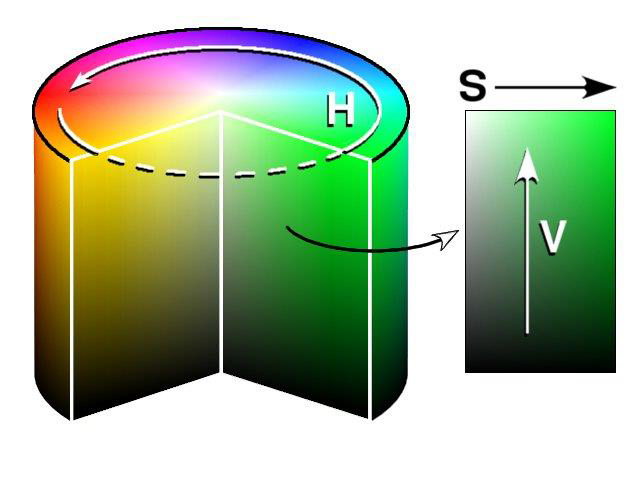

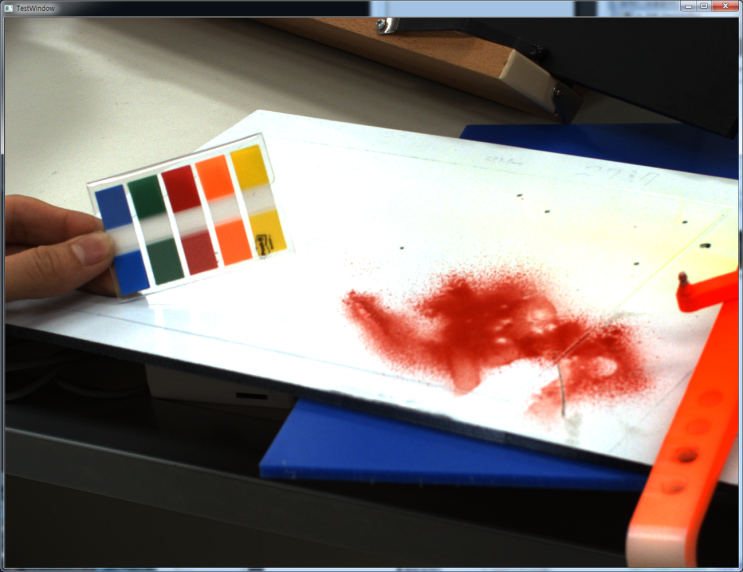

#### HSV - H만 적용
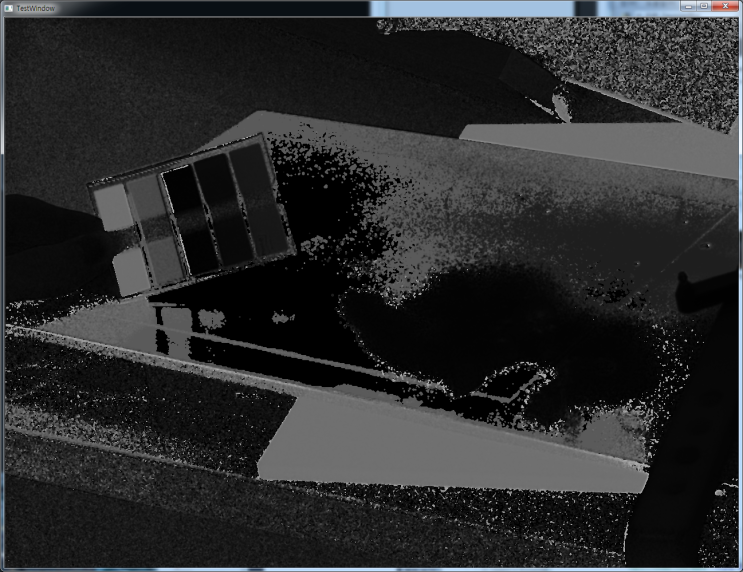

#### HSV - S만 적용
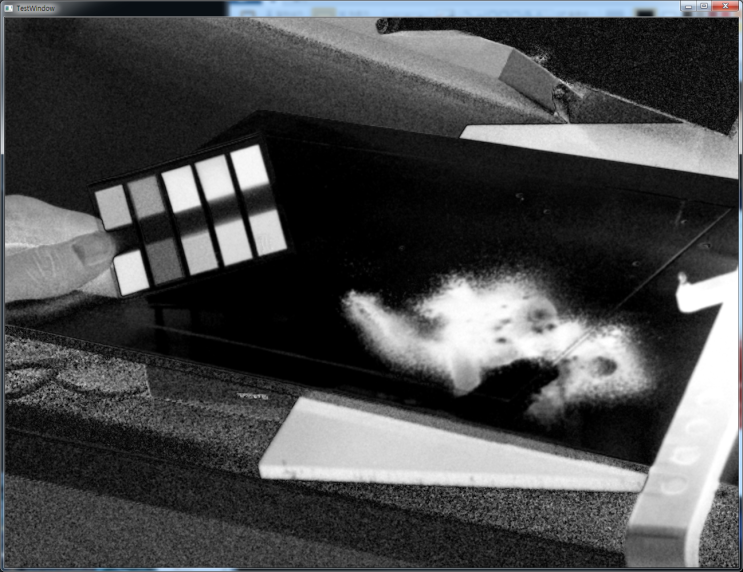

## YCrCb  (아래는 CbCr 평면, Y = 0.5로 고정)
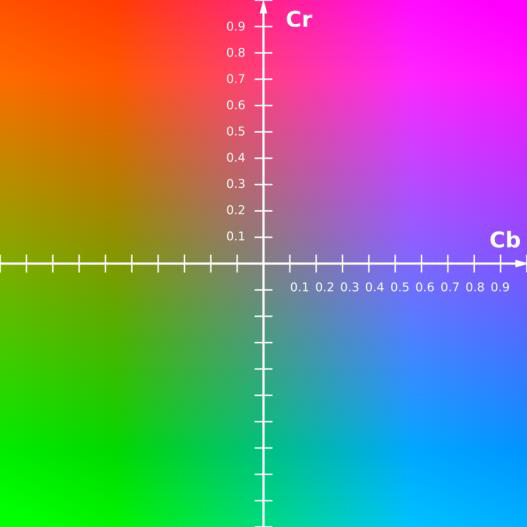

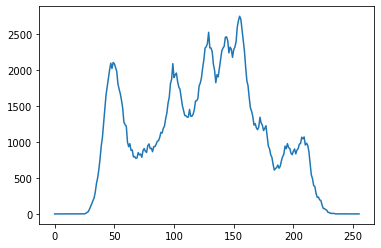

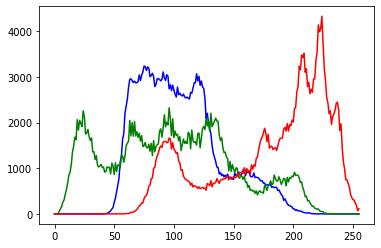

In [17]:
####### 컬러 영상과 색 공간 #######

### 히스토그램 분석
# - 영상의 픽셀값 분포를그래프의 형태로 표현한것 
# - 예를들어 그레이 스케일 영상에서 각 그레이스케일 값에 해당하는 픽셀의 개수를 구하고, 이를 막대 그래프의 형태로 표현
# - 정규화된히스토그램(Normalized histogram) : 각픽셀의개수를영상전체픽셀개수로나누어준것


# 히스토그램구하기
# - cv2.calcHist(images, channels, mask, histSize, ranges, hist=None, accumulate=None) -> hist
#     • images: 입력 영상 리스트 
#     • channels: 히스토그램을 구할 채널을 나타내는 리스트 -> 3번째 채널이면 [2], 1번째 채널이면 [0]
#     • mask: 마스크영상. 입력영상 전체에서 히스토그램을 구하려면 None지정. 
#     • histSize: 히스토그램 각 차원의크기(빈(bin)의 개수)를 나타내는 리스트 -> uint8이면 2^8 = 256
#     • ranges: 히스토그램 각 차원의 최솟값과 최댓값으로 구성된리스트 
#     • hist: 계산된히스토그램 (numpy.ndarray) 
#     • accumulate: 기존의 hist 히스토그램에 누적하려면 True, 새로만들려면 False 

import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


# 그레이스케일 영상의 히스토그램
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])      ### 히스토그램구하기

cv2.imshow('src', src)
cv2.waitKey(1000)

plt.plot(hist)
plt.show()




# 컬러 영상의 히스토그램
src = cv2.imread('lenna.bmp')  ## 3채널은 분리해서 노말라이즈 진행 필요 
                               ## 근데 해보니 효과가 미약한거 같기도...?
                               ## Ycrcb로 변환하여, 밝기 성분(Y)에 대해서만 히스토그램 정규화 수행하는 방법도 존재

if src is None:
    print('Image load failed!')
    sys.exit()

colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)

for (p, c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])       ### 히스토그램구하기
    plt.plot(hist, color=c)

cv2.imshow('src', src)
cv2.waitKey(1000)

plt.show()

cv2.destroyAllWindows()


In [18]:
####### 컬러 영상과 색 공간 #######

##### 명암과 명암 조절 #####

import sys
import numpy as np
import cv2


src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

alpha = 1.0
dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8) 
## 해당 식을 통해 명암이 낮은건 더 낮아지게, 높은건 더 높아지게 됨, -> 명암이 128부근에 분포 많이할 경우, 적용 잘됨 

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


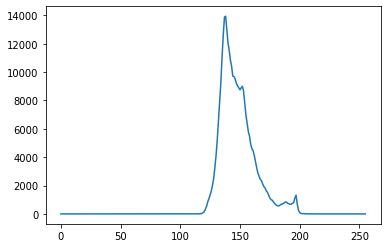

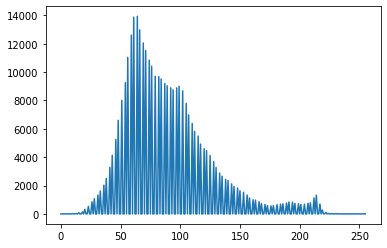

In [22]:
####### 컬러 영상과 색 공간 #######

##### 히스토그램스트레칭(Histogram stretching) #####
# cv2.normalize(src, dst, alpha=None, beta=None, norm_type=None, dtype=None, mask=None) -> dst
# • src: 입력영상
# • dst: 결과영상  -> 주로 None으로 입력
# • alpha: (노름정규화인경우) 목표노름값, (원소값범위정규화인경우) 최솟값    -> 0
# • beta: (원소값범위정규화인경우) 최댓값                                -> 255
# • norm_type: 정규화타입. NORM_INF, NORM_L1, NORM_L2, NORM_MINMAX.  ->  NORM_MINMAX 주로 활용(0, 255)
# • dtype: 결과영상의타입 
# • mask: 마스크영상

import sys
import numpy as np
import cv2

src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(src)
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
#dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)  -> 실제로 계산식으로 구현할 경우의 코드, 강의 영상 참고

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()


src_his = cv2.calcHist([src], [0], None, [256], [0, 256]) 
dst_his = cv2.calcHist([dst], [0], None, [256], [0, 256]) 
plt.plot(src_his)
plt.show()

plt.plot(dst_his)
plt.show()
cv2.destroyAllWindows()


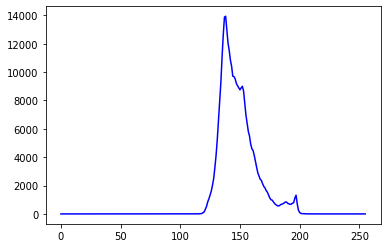

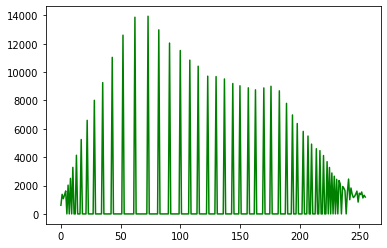

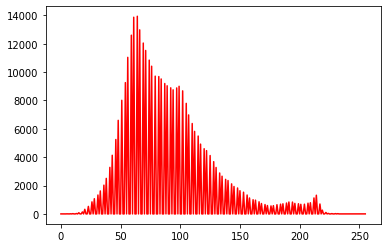

In [3]:
####### 컬러 영상과 색 공간 #######


##### 히스토그램 평활화 #####
# • 히스토그램이 그레이스케일 전체 구간에서 균일한 분포로 나타나도록 변경하는 명암비 향상기법 
# • 히스토그램 균등화, 균일화, 평탄화
# 누적 분포 함수 X 변환함수(최대범위)를 활용한 개념 : 강의 영상/자료 참고

# cv2.equalizeHist(src, dst=None) -> dst
# - src: 입력영상. 그레이스케일영상.


import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


### 그레이스케일 영상의 히스토그램 평활화
src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.equalizeHist(src)                    ### 평활화
dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)  ## 정규화, 스트레칭 (비교용)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst_norm', dst_norm)
cv2.waitKey(3000)

cv2.destroyAllWindows()


src_his = cv2.calcHist([src], [0], None, [256], [0, 256]) 
dst_his = cv2.calcHist([dst], [0], None, [256], [0, 256]) 
dst_norm_his = cv2.calcHist([dst_norm], [0], None, [256], [0, 256]) 



### 정규화와 평활화 비교해보기 ###
plt.plot(src_his, color='b')
plt.show()

plt.plot(dst_his, color='g')    ### 평활화는 양에 따라 x축 간격을 조정한다.
plt.show()

plt.plot(dst_norm_his, color='r')   ### 정규화는 x축을 일정 간격으로 벌려준다.
plt.show()

cv2.destroyAllWindows()





In [25]:
####### 컬러 영상과 색 공간 #######


### 컬러 영상의 히스토그램 평활화
src = cv2.imread('field.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)   ## YCrCb 형태로 바꾸어, Y(밝기)만 뽑아내자.
ycrcb_planes = cv2.split(src_ycrcb)

# YCrCb :
# • Y: 밝기 정보(luma)
# • Cr, Cb: 색차(chroma)



##  ***** 밝기 성분(Y)에 대해서만 히스토그램 평활화 수행 *****
ycrcb_planes_0 = cv2.equalizeHist(ycrcb_planes[0])

dst_ycrcb = np.dstack([ycrcb_planes_0, ycrcb_planes[1], ycrcb_planes[2]])
# 또는 dst_ycrcb = cv2.merge((ycrcb_planes_0,ycrcb_planes[1], ycrcb_planes[2] ))

dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


## 또는 아래 코드로 가능

# src = cv2.imread('field.bmp')

# if src is None:
#     print('Image load failed!')
#     sys.exit()

# src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
# ycrcb_planes = cv2.split(src_ycrcb)
# ycrcb_planes = list(ycrcb_planes)  ## tuple을 list로 변경, tuple은 수정이 안됨
# # 밝기 성분에 대해서만 히스토그램 평활화 수행
# ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])

# dst_ycrcb = cv2.merge(ycrcb_planes)
# dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

# cv2.imshow('src', src)
# cv2.imshow('dst', dst)
# cv2.waitKey()

# cv2.destroyAllWindows()

In [28]:
####### 컬러 영상과 색 공간 #######

### 특정 색상 영역 추출 ###

import sys
import numpy as np
import cv2


src = cv2.imread('candies.png')
#src = cv2.imread('candies2.png')

if src is None:
    print('Image load failed!')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

### 특정 범위 안에 있는 원소 검출 ##
# cv2.inRange(src, lowerb, upperb, dst=None) -> dst
# • src: 입력 행렬
# • lowerb: 하한 값 행렬 또는 스칼라
# • upperb: 상한 값 행렬 또는 스칼라
# • dst: 입력 영상과 같은 크기의 마스크 영상. (numpy.uint8) 범위 안에 들어가는 픽셀은 255, 나머지는 0으로 설정.

dst1 = cv2.inRange(src, (128, 0, 0), (255, 100, 100))  
## 파랑색 성분이 높은 영역만 나타나게 함. B:128~255, G:0~100, R:0~100
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255)) ## 초록색 성분이 높은 영역만 나타나게함.

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()


In [ ]:
####### 컬러 영상과 색 공간 #######

### 히스토그램 역투영 ###
# • 영상의 각 픽셀이 주어진 히스토그램 모델에 얼마나 일치하는지를 검사하는 방법
# • 임의의 색상 영역을 검출할 때 효과적  (ex. 살색 영역 검출)

# cv2.calcBackProject(images, channels, hist, ranges, scale, dst=None) -> dst
# • images: 입력 영상 리스트
# • channels: 역투영 계산에 사용할 채널 번호 리스트
# • hist: 입력 히스토그램 (numpy.ndarray)
# • ranges: 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
# • scale: 출력 역투영 행렬에 추가적으로 곱할 값
# • dst: 출력 역투영 영상. 입력 영상과 동일 크기, cv2.CV_8U.

import sys
import numpy as np
import cv2


# 입력 영상에서 ROI(Region of Interest, 관심영역)를 지정하고, 히스토그램 계산

src = cv2.imread('cropland.png')

if src is None:
    print('Image load failed!')
    sys.exit()

x, y, w, h = cv2.selectROI(src)  # 원본 이미지를 띄우고, 마우스 이벤트 처리를 통해 
                                 # (x 시작 지점, y 시작 지점, x축 드래그 한 길이, y축 드래그 한 길이) 출력

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([crop], channels, None, histSize, ranges)
hist_norm = cv2.normalize(cv2.log(hist+1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상 전체에 대해 히스토그램 역투영

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src, backproj)

cv2.imshow('backproj', backproj)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()




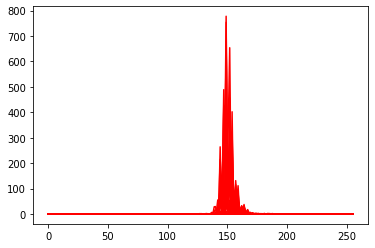

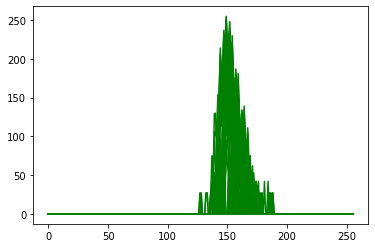

In [37]:
####### 컬러 영상과 색 공간 #######

### 히스토그램 역투영 ###
# • 영상의 각 픽셀이 주어진 히스토그램 모델에 얼마나 일치하는지를 검사하는 방법
# • 임의의 색상 영역을 검출할 때 효과적  (ex. 살색 영역 검출)

# cv2.calcBackProject(images, channels, hist, ranges, scale, dst=None) -> dst
# • images: 입력 영상 리스트
# • channels: 역투영 계산에 사용할 채널 번호 리스트
# • hist: 입력 히스토그램 (numpy.ndarray)
# • ranges: 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
# • scale: 출력 역투영 행렬에 추가적으로 곱할 값
# • dst: 출력 역투영 영상. 입력 영상과 동일 크기, cv2.CV_8U.


import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

# CrCb 살색 히스토그램 구하기
ref = cv2.imread('kids1.png', cv2.IMREAD_COLOR)
mask = cv2.imread('kids1_mask.bmp', cv2.IMREAD_GRAYSCALE)

if ref is None or mask is None:
    print('Image load failed!')
    sys.exit()

ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

channels = [1, 2] ## Cr, Cb 2개에 대한 채널
ranges = [0, 256, 0, 256]
hist = cv2.calcHist([ref_ycrcb], channels, mask, [256, 256], ranges)## 왜 128인가? 256이어야되는데... 근데 왜 128이 성능이 좋지?
hist_norm = cv2.normalize(cv2.log(hist + 1), None, 0, 255,  cv2.NORM_MINMAX, cv2.CV_8U)  ## 히스토그램을 다시 한번 정규화

# 입력 영상에 히스토그램 역투영 적용
src = cv2.imread('kids2.png', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
backproj_norm = cv2.calcBackProject([src_ycrcb], channels, hist_norm, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('hist', hist)                     ### 히스토그램을 정규화 안한게 성능이 더 좋음
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('backproj', backproj) 
cv2.imshow('backproj_norm', backproj_norm)  
cv2.waitKey(10000)
cv2.destroyAllWindows()


plt.plot(hist, color = 'r')
plt.show()

plt.plot(hist_norm, color = 'g')
plt.show()

In [40]:
### 크로마키 합성 ###
 

import sys
import numpy as np
import cv2


# 녹색 배경 동영상
cap1 = cv2.VideoCapture('woman.mp4')

if not cap1.isOpened():
    print('video open failed!')
    sys.exit()

# 비오는 배경 동영상
cap2 = cv2.VideoCapture('raining.mp4')

if not cap2.isOpened():
    print('video open failed!')
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 합성 여부 플래그
do_composit = False

# 전체 동영상 재생
while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break
    
    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (70, 255, 255))  ## frame1의 녹색영역을 mask에 저장
        cv2.copyTo(frame2, mask, frame1)  ## frame2를 mask 영역으로 마스킹하여 frame1에 옮김

        
    cv2.imshow('frame', frame1)
    key = cv2.waitKey(delay)

    # 스페이스바를 누르면 do_composit 플래그를 변경
    if key == ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()


frame_cnt1: 409
frame_cnt2: 353
